In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df

,match_id,batting_team,bowling_team,batsman,balls,runs,player_of_dismissed,player_of_match,city
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne
...,...,...,...,...,...,...,...,...,...
116542,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo
116543,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo
116544,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo
116545,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo


In [4]:
group = df.groupby(['match_id', 'batsman'])['runs'].sum()
group

match_id  batsman        
2         AJ Finch           44
          AJ Turner          19
          JP Faulkner        15
          M Klinger          40
          MC Henriques       18
                             ..
964       NLTC Perera         0
          S Prasanna          7
          SMSM Senanayake    10
          SS Pathirana        7
          TM Dilshan          1
Name: runs, Length: 3360, dtype: int64

In [5]:
group[group.index.get_level_values('batsman') == 'DM de Silva']

match_id  batsman    
133       DM de Silva    17
837       DM de Silva    14
964       DM de Silva    64
Name: runs, dtype: int64

In [6]:
grouped = group.reset_index(name='total_runs')
df = df.merge(grouped, on=['match_id', 'batsman'], how='left')
df

,match_id,batting_team,bowling_team,batsman,balls,runs,player_of_dismissed,player_of_match,city,total_runs
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,44
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,44
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,44
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,40
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,40
...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,10
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,64
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,64
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,10


In [7]:
df.groupby('match_id').max('total_runs')

,balls,runs,total_runs
match_id,,,
2,19.7,6,44
4,19.6,6,65
10,19.6,6,102
11,19.7,6,95
12,19.6,6,71
...,...,...,...
958,19.6,6,58
960,19.6,6,78
961,14.6,6,34


In [8]:
max_scorers = df.loc[df.groupby('match_id')['total_runs'].idxmax()]
max_scorers

# max_run_indices = df.groupby('match_id')['total_runs'].idxmax()
# max_scorers = df.loc[max_run_indices]
# max_scorers

,match_id,batting_team,bowling_team,batsman,balls,runs,player_of_dismissed,player_of_match,city,total_runs
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,44
130,4,Australia,Sri Lanka,M Klinger,0.6,0,0,A Zampa,Adelaide,65
251,10,New Zealand,Bangladesh,C Munro,0.2,3,0,C Munro,Mount Maunganui,102
415,11,New Zealand,Bangladesh,CJ Anderson,6.5,1,0,CJ Anderson,Mount Maunganui,95
496,12,South Africa,New Zealand,HM Amla,0.1,0,0,Imran Tahir,Auckland,71
...,...,...,...,...,...,...,...,...,...,...
50549,958,Pakistan,Bangladesh,Sarfraz Ahmed,3.6,4,0,Soumya Sarkar,Mirpur,58
50650,960,Sri Lanka,Pakistan,TM Dilshan,0.5,1,0,Umar Akmal,Mirpur,78
50843,961,Bangladesh,India,Mahmudullah,12.3,2,0,S Dhawan,Mirpur,34
50860,963,Australia,Sri Lanka,GJ Maxwell,0.1,0,0,GJ Maxwell,Pallekele,149


In [9]:
max_scorers.batsman

0             AJ Finch
130          M Klinger
251            C Munro
415        CJ Anderson
496            HM Amla
             ...      
50549    Sarfraz Ahmed
50650       TM Dilshan
50843      Mahmudullah
50860       GJ Maxwell
50992      DM de Silva
Name: batsman, Length: 421, dtype: object

In [10]:
df = df.merge(max_scorers[['match_id', 'batsman']], on='match_id', how='left')
df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,44,AJ Finch
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,44,AJ Finch
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,44,AJ Finch
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,40,AJ Finch
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,40,AJ Finch
...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,10,DM de Silva
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,64,DM de Silva
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,64,DM de Silva
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,10,DM de Silva


In [11]:
df['player_of_match'].fillna(df['batsman_y'], inplace=True)
df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,44,AJ Finch
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,44,AJ Finch
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,44,AJ Finch
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,40,AJ Finch
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,40,AJ Finch
...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,10,DM de Silva
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,64,DM de Silva
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,64,DM de Silva
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,10,DM de Silva


In [12]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
batsman_x              0
balls                  0
runs                   0
player_of_dismissed    0
player_of_match        0
city                   0
total_runs             0
batsman_y              0
dtype: int64

In [13]:
df[(df['runs'] == 4) | (df['runs'] == 6)]

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y
10,2,Australia,Sri Lanka,AJ Finch,1.5,4,0,DAS Gunaratne,Melbourne,44,AJ Finch
16,2,Australia,Sri Lanka,M Klinger,2.5,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
22,2,Australia,Sri Lanka,M Klinger,3.5,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
26,2,Australia,Sri Lanka,M Klinger,4.3,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
27,2,Australia,Sri Lanka,M Klinger,4.4,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
...,...,...,...,...,...,...,...,...,...,...,...
51033,964,Sri Lanka,Australia,BKG Mendis,8.2,4,0,GJ Maxwell,Colombo,5,DM de Silva
51050,964,Sri Lanka,Australia,DM de Silva,11.1,4,0,GJ Maxwell,Colombo,64,DM de Silva
51067,964,Sri Lanka,Australia,SS Pathirana,13.6,4,0,GJ Maxwell,Colombo,7,DM de Silva
51074,964,Sri Lanka,Australia,DM de Silva,14.6,4,0,GJ Maxwell,Colombo,64,DM de Silva


In [14]:
filtered_df = df[(df['runs'] == 4) | (df['runs'] == 6)]
result = filtered_df.groupby('match_id')['runs'].sum()

In [15]:
result

match_id
2       60
4      104
10     108
11     126
12     126
      ... 
958     72
960     84
961     60
963    188
964     44
Name: runs, Length: 420, dtype: int64

In [16]:
filtered_df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y
10,2,Australia,Sri Lanka,AJ Finch,1.5,4,0,DAS Gunaratne,Melbourne,44,AJ Finch
16,2,Australia,Sri Lanka,M Klinger,2.5,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
22,2,Australia,Sri Lanka,M Klinger,3.5,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
26,2,Australia,Sri Lanka,M Klinger,4.3,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
27,2,Australia,Sri Lanka,M Klinger,4.4,4,0,DAS Gunaratne,Melbourne,40,AJ Finch
...,...,...,...,...,...,...,...,...,...,...,...
51033,964,Sri Lanka,Australia,BKG Mendis,8.2,4,0,GJ Maxwell,Colombo,5,DM de Silva
51050,964,Sri Lanka,Australia,DM de Silva,11.1,4,0,GJ Maxwell,Colombo,64,DM de Silva
51067,964,Sri Lanka,Australia,SS Pathirana,13.6,4,0,GJ Maxwell,Colombo,7,DM de Silva
51074,964,Sri Lanka,Australia,DM de Silva,14.6,4,0,GJ Maxwell,Colombo,64,DM de Silva


In [17]:
df[(df.match_id == 4) & (df['runs'] == 4)]['runs'].sum()

56

In [18]:
df[(df.match_id == 4) & (df['runs'] == 6)]['runs'].sum()

48

In [19]:
bound = result.reset_index(name='boundery')
df = df.merge(bound, on='match_id', how='left')
df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y,boundery
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,44,AJ Finch,60.0
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,44,AJ Finch,60.0
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,44,AJ Finch,60.0
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,40,AJ Finch,60.0
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,40,AJ Finch,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,10,DM de Silva,44.0
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,64,DM de Silva,44.0
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,64,DM de Silva,44.0
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,10,DM de Silva,44.0


In [20]:
bound

,match_id,boundery
0,2,60
1,4,104
2,10,108
3,11,126
4,12,126
...,...,...
415,958,72
416,960,84
417,961,60
418,963,188


In [21]:
df.dtypes

match_id                 int64
batting_team            object
bowling_team            object
batsman_x               object
balls                  float64
runs                     int64
player_of_dismissed     object
player_of_match         object
city                    object
total_runs               int64
batsman_y               object
boundery               float64
dtype: object

In [22]:
df.boundery

0        60.0
1        60.0
2        60.0
3        60.0
4        60.0
         ... 
51104    44.0
51105    44.0
51106    44.0
51107    44.0
51108    44.0
Name: boundery, Length: 51109, dtype: float64

In [23]:
bound.dtypes

match_id    int64
boundery    int64
dtype: object

In [24]:
print(bound['boundery'].dtype)
print(bound['boundery'].unique())

int64
[ 60 104 108 126  62 114  56 120 178  88  54  72  30  36  58 158 132  74
  70  96  84 154  40 124  98  64  50  76 122  66 128 100  94 102  90 140
  68 136  82 156  52 134 142 116 172 112  92  86 110 106  22 144  78  42
 130  38  46  12  48 118 174  44  32 146  80  20 184 150  34  14 148 188]


In [25]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
batsman_x              0
balls                  0
runs                   0
player_of_dismissed    0
player_of_match        0
city                   0
total_runs             0
batsman_y              0
boundery               2
dtype: int64

In [26]:
nan_rows = df[df['boundery'].isna()]
nan_rows

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y,boundery
35750,700,England,New Zealand,MJ Lumb,0.1,2,0,MJ Lumb,London,2,MJ Lumb,NaN
35751,700,England,New Zealand,MJ Lumb,0.2,0,MJ Lumb,MJ Lumb,London,2,MJ Lumb,NaN


In [27]:
df['boundery'] = df['boundery'].fillna(0).astype(int)
df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y,boundery
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,44,AJ Finch,60
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,44,AJ Finch,60
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,44,AJ Finch,60
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,40,AJ Finch,60
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,40,AJ Finch,60
...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,10,DM de Silva,44
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,64,DM de Silva,44
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,64,DM de Silva,44
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,10,DM de Silva,44


In [28]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
batsman_x              0
balls                  0
runs                   0
player_of_dismissed    0
player_of_match        0
city                   0
total_runs             0
batsman_y              0
boundery               0
dtype: int64

In [29]:
df[df.match_id == 4]

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,total_runs,batsman_y,boundery
125,4,Australia,Sri Lanka,AJ Finch,0.1,0,0,A Zampa,Adelaide,55,M Klinger,104
126,4,Australia,Sri Lanka,AJ Finch,0.2,0,0,A Zampa,Adelaide,55,M Klinger,104
127,4,Australia,Sri Lanka,AJ Finch,0.3,0,0,A Zampa,Adelaide,55,M Klinger,104
128,4,Australia,Sri Lanka,AJ Finch,0.4,0,0,A Zampa,Adelaide,55,M Klinger,104
129,4,Australia,Sri Lanka,AJ Finch,0.5,1,0,A Zampa,Adelaide,55,M Klinger,104
...,...,...,...,...,...,...,...,...,...,...,...,...
245,4,Australia,Sri Lanka,JP Faulkner,19.2,0,JP Faulkner,A Zampa,Adelaide,2,M Klinger,104
246,4,Australia,Sri Lanka,MC Henriques,19.3,1,0,A Zampa,Adelaide,3,M Klinger,104
247,4,Australia,Sri Lanka,TD Paine,19.4,0,0,A Zampa,Adelaide,1,M Klinger,104
248,4,Australia,Sri Lanka,TD Paine,19.5,1,0,A Zampa,Adelaide,1,M Klinger,104


In [30]:
df.drop(columns=['total_runs','batsman_y'],inplace=True)

In [31]:
df['current_score'] = df.groupby('match_id')['runs'].cumsum()
df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,boundery,current_score
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,60,0
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,60,0
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,60,1
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,60,3
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,60,3
...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,44,125
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,44,125
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,44,125
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,44,127


In [32]:
df.groupby('match_id')['runs'].sum()
# df['Final_score'] = df.groupby('match_id')['runs'].sum()
# df
# null values - Final_score            50789

match_id
2      168
4      187
10     195
11     194
12     185
      ... 
958    129
960    150
961    120
963    263
964    128
Name: runs, Length: 421, dtype: int64

## sum()
The code `result_df['current_score'] = result_df.groupby('match_id')['runs'].sum()` didn't produce the expected result because it attempted to calculate the sum of runs for each match and then broadcast that single value to all rows within each match. This resulted in NaN values for all rows except the first row of each match because the 'match_id' grouping wasn't maintained.

In contrast, the previous code `result_df['current_score'] = result_df.groupby('match_id')['runs'].cumsum()` worked correctly because it calculated the cumulative sum within each match, preserving the grouping by 'match_id' and providing a cumulative score for each row within a match.

To summarize, `cumsum()` is used for a cumulative sum within groups, while `sum()` is used for a single sum across the entire group. The choice between the two depends on whether you want to calculate cumulative values within groups or a single aggregate value for the entire group.

In [33]:
df['Final_score'] = df.groupby('match_id')['runs'].transform('sum')
df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,boundery,current_score,Final_score
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,60,0,168
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,60,0,168
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,60,1,168
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,60,3,168
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,60,3,168
...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,44,125,128
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,44,125,128
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,44,125,128
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,44,127,128


In [34]:
# boundary_percentage = (total_boundaries / total_runs) * 100
boundary_percentage = (df['boundery'] / df['Final_score']) * 100
boundary_percentage = boundary_percentage.round(2)
boundary_percentage

0        35.71
1        35.71
2        35.71
3        35.71
4        35.71
         ...  
51104    34.38
51105    34.38
51106    34.38
51107    34.38
51108    34.38
Length: 51109, dtype: float64

In [35]:
df['Boundary%'] = boundary_percentage
df

,match_id,batting_team,bowling_team,batsman_x,balls,runs,player_of_dismissed,player_of_match,city,boundery,current_score,Final_score,Boundary%
0,2,Australia,Sri Lanka,AJ Finch,0.1,0,0,DAS Gunaratne,Melbourne,60,0,168,35.71
1,2,Australia,Sri Lanka,AJ Finch,0.2,0,0,DAS Gunaratne,Melbourne,60,0,168,35.71
2,2,Australia,Sri Lanka,AJ Finch,0.3,1,0,DAS Gunaratne,Melbourne,60,1,168,35.71
3,2,Australia,Sri Lanka,M Klinger,0.4,2,0,DAS Gunaratne,Melbourne,60,3,168,35.71
4,2,Australia,Sri Lanka,M Klinger,0.5,0,0,DAS Gunaratne,Melbourne,60,3,168,35.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,SMSM Senanayake,19.3,1,0,GJ Maxwell,Colombo,44,125,128,34.38
51105,964,Sri Lanka,Australia,DM de Silva,19.4,0,0,GJ Maxwell,Colombo,44,125,128,34.38
51106,964,Sri Lanka,Australia,DM de Silva,19.5,0,DM de Silva,GJ Maxwell,Colombo,44,125,128,34.38
51107,964,Sri Lanka,Australia,SMSM Senanayake,19.6,2,0,GJ Maxwell,Colombo,44,127,128,34.38


In [36]:
old = df.copy()

In [37]:
df = df[['match_id','batting_team','bowling_team','balls','runs','current_score','player_of_dismissed','player_of_match','city','Boundary%','Final_score']]

In [38]:
df

,match_id,batting_team,bowling_team,balls,runs,current_score,player_of_dismissed,player_of_match,city,Boundary%,Final_score
0,2,Australia,Sri Lanka,0.1,0,0,0,DAS Gunaratne,Melbourne,35.71,168
1,2,Australia,Sri Lanka,0.2,0,0,0,DAS Gunaratne,Melbourne,35.71,168
2,2,Australia,Sri Lanka,0.3,1,1,0,DAS Gunaratne,Melbourne,35.71,168
3,2,Australia,Sri Lanka,0.4,2,3,0,DAS Gunaratne,Melbourne,35.71,168
4,2,Australia,Sri Lanka,0.5,0,3,0,DAS Gunaratne,Melbourne,35.71,168
...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,19.3,1,125,0,GJ Maxwell,Colombo,34.38,128
51105,964,Sri Lanka,Australia,19.4,0,125,0,GJ Maxwell,Colombo,34.38,128
51106,964,Sri Lanka,Australia,19.5,0,125,DM de Silva,GJ Maxwell,Colombo,34.38,128
51107,964,Sri Lanka,Australia,19.6,2,127,0,GJ Maxwell,Colombo,34.38,128


In [39]:
df['over'] = df['balls'].apply(lambda x : str(x).split('.')[0])
df['ball_no'] = df['balls'].apply(lambda x : str(x).split('.')[1])

C:\Users\sonal\AppData\Local\Temp\ipykernel_6116\680941672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['balls'].apply(lambda x : str(x).split('.')[0])


In [40]:
df.dtypes

match_id                 int64
batting_team            object
bowling_team            object
balls                  float64
runs                     int64
current_score            int64
player_of_dismissed     object
player_of_match         object
city                    object
Boundary%              float64
Final_score              int64
over                    object
ball_no                 object
dtype: object

In [41]:
df

,match_id,batting_team,bowling_team,balls,runs,current_score,player_of_dismissed,player_of_match,city,Boundary%,Final_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,1
1,2,Australia,Sri Lanka,0.2,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,2
2,2,Australia,Sri Lanka,0.3,1,1,0,DAS Gunaratne,Melbourne,35.71,168,0,3
3,2,Australia,Sri Lanka,0.4,2,3,0,DAS Gunaratne,Melbourne,35.71,168,0,4
4,2,Australia,Sri Lanka,0.5,0,3,0,DAS Gunaratne,Melbourne,35.71,168,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,19.3,1,125,0,GJ Maxwell,Colombo,34.38,128,19,3
51105,964,Sri Lanka,Australia,19.4,0,125,0,GJ Maxwell,Colombo,34.38,128,19,4
51106,964,Sri Lanka,Australia,19.5,0,125,DM de Silva,GJ Maxwell,Colombo,34.38,128,19,5
51107,964,Sri Lanka,Australia,19.6,2,127,0,GJ Maxwell,Colombo,34.38,128,19,6


In [42]:
df['balls_bowled']=(df['over'].astype('int') * 6 )+ df['ball_no'].astype('int')
df['ball_left'] = 120 - df['balls_bowled']
df['ball_left'] = df['ball_left'].apply(lambda x : 0 if x<0 else x)
df

,match_id,batting_team,bowling_team,balls,runs,current_score,player_of_dismissed,player_of_match,city,Boundary%,Final_score,over,ball_no,balls_bowled,ball_left
0,2,Australia,Sri Lanka,0.1,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,1,0,DAS Gunaratne,Melbourne,35.71,168,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,3,0,DAS Gunaratne,Melbourne,35.71,168,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,3,0,DAS Gunaratne,Melbourne,35.71,168,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,19.3,1,125,0,GJ Maxwell,Colombo,34.38,128,19,3,117,3
51105,964,Sri Lanka,Australia,19.4,0,125,0,GJ Maxwell,Colombo,34.38,128,19,4,118,2
51106,964,Sri Lanka,Australia,19.5,0,125,DM de Silva,GJ Maxwell,Colombo,34.38,128,19,5,119,1
51107,964,Sri Lanka,Australia,19.6,2,127,0,GJ Maxwell,Colombo,34.38,128,19,6,120,0


In [43]:
df['player_of_dismissed'] = df['player_of_dismissed'].apply(lambda x : 0 if x=='0' else 1)
df['player_of_dismissed'] = df['player_of_dismissed'].astype('int')

In [44]:
df['player_of_dismissed'] = df.groupby('match_id')['player_of_dismissed'].cumsum()

In [45]:
df['wicket_left'] = 10 - df['player_of_dismissed']

In [46]:
df['crr'] = (df['current_score'] * 6 ) /df['balls_bowled']

In [47]:
df

,match_id,batting_team,bowling_team,balls,runs,current_score,player_of_dismissed,player_of_match,city,Boundary%,Final_score,over,ball_no,balls_bowled,ball_left,wicket_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,1,0,DAS Gunaratne,Melbourne,35.71,168,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,3,0,DAS Gunaratne,Melbourne,35.71,168,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,3,0,DAS Gunaratne,Melbourne,35.71,168,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,19.3,1,125,8,GJ Maxwell,Colombo,34.38,128,19,3,117,3,2,6.410256
51105,964,Sri Lanka,Australia,19.4,0,125,8,GJ Maxwell,Colombo,34.38,128,19,4,118,2,2,6.355932
51106,964,Sri Lanka,Australia,19.5,0,125,9,GJ Maxwell,Colombo,34.38,128,19,5,119,1,1,6.302521
51107,964,Sri Lanka,Australia,19.6,2,127,9,GJ Maxwell,Colombo,34.38,128,19,6,120,0,1,6.350000


In [48]:
groupss = df.groupby('match_id')
ids = groupss.groups.keys()
ids

dict_keys([2, 4, 10, 11, 12, 13, 15, 18, 19, 23, 24, 25, 26, 27, 31, 33, 34, 35, 36, 37, 52, 53, 54, 55, 56, 57, 61, 62, 63, 65, 67, 68, 69, 70, 71, 78, 79, 81, 84, 85, 86, 87, 88, 89, 92, 97, 98, 99, 100, 101, 102, 103, 109, 120, 130, 131, 132, 133, 134, 135, 138, 139, 142, 143, 144, 147, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 193, 195, 196, 220, 221, 222, 224, 230, 232, 234, 237, 238, 239, 242, 243, 244, 245, 246, 247, 250, 251, 304, 305, 306, 307, 308, 309, 310, 311, 312, 394, 395, 422, 423, 431, 432, 433, 434, 435, 440, 442, 443, 444, 445, 447, 449, 450, 451, 452, 453, 454, 455, 456, 457, 461, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 484, 485, 486, 487, 488, 489, 490, 495, 497, 498, 499, 500, 501, 503, 504, 508, 509, 511, 513, 515, 517, 519, 520, 521, 522, 523, 525, 526, 528, 529, 530, 531, 532, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 550, 551, 554, 555, 557, 558, 562, 563, 564, 565, 566, 567,

In [49]:
len(ids)

421

In [50]:
match_ids = df.match_id.unique()

In [51]:
last_five = []
for id in match_ids:
    last_five.extend(groupss.get_group(id)['runs'].rolling(window = 30).sum().values.tolist())


   # rolling_sum = groups.get_group(id)['runs'].rolling(window=30, min_periods=1).sum()
    # last_five.extend(rolling_sum.values.tolist())

In [52]:
last_five

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 43.0,
 44.0,
 45.0,
 44.0,
 42.0,
 43.0,
 41.0,
 41.0,
 41.0,
 42.0,
 42.0,
 39.0,
 38.0,
 39.0,
 38.0,
 39.0,
 40.0,
 37.0,
 41.0,
 42.0,
 42.0,
 44.0,
 44.0,
 40.0,
 39.0,
 37.0,
 35.0,
 31.0,
 27.0,
 26.0,
 31.0,
 31.0,
 30.0,
 31.0,
 31.0,
 32.0,
 31.0,
 31.0,
 36.0,
 37.0,
 37.0,
 37.0,
 37.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 32.0,
 32.0,
 31.0,
 29.0,
 29.0,
 31.0,
 32.0,
 32.0,
 32.0,
 33.0,
 36.0,
 37.0,
 37.0,
 39.0,
 41.0,
 40.0,
 41.0,
 41.0,
 42.0,
 44.0,
 39.0,
 43.0,
 45.0,
 48.0,
 48.0,
 48.0,
 49.0,
 49.0,
 49.0,
 51.0,
 51.0,
 51.0,
 52.0,
 52.0,
 53.0,
 53.0,
 53.0,
 54.0,
 53.0,
 52.0,
 50.0,
 53.0,
 47.0,
 46.0,
 45.0,
 46.0,
 47.0,
 49.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [53]:
df['last_five']=last_five
df

,match_id,batting_team,bowling_team,balls,runs,current_score,player_of_dismissed,player_of_match,city,Boundary%,Final_score,over,ball_no,balls_bowled,ball_left,wicket_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,0,DAS Gunaratne,Melbourne,35.71,168,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,1,0,DAS Gunaratne,Melbourne,35.71,168,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,3,0,DAS Gunaratne,Melbourne,35.71,168,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,3,0,DAS Gunaratne,Melbourne,35.71,168,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51104,964,Sri Lanka,Australia,19.3,1,125,8,GJ Maxwell,Colombo,34.38,128,19,3,117,3,2,6.410256,32.0
51105,964,Sri Lanka,Australia,19.4,0,125,8,GJ Maxwell,Colombo,34.38,128,19,4,118,2,2,6.355932,32.0
51106,964,Sri Lanka,Australia,19.5,0,125,9,GJ Maxwell,Colombo,34.38,128,19,5,119,1,1,6.302521,32.0
51107,964,Sri Lanka,Australia,19.6,2,127,9,GJ Maxwell,Colombo,34.38,128,19,6,120,0,1,6.350000,33.0


In [54]:
final_df = df[['batting_team','bowling_team','city','current_score','ball_left','wicket_left','crr','last_five','Final_score','Boundary%','player_of_match']]

In [55]:
final_df

,batting_team,bowling_team,city,current_score,ball_left,wicket_left,crr,last_five,Final_score,Boundary%,player_of_match
0,Australia,Sri Lanka,Melbourne,0,119,10,0.000000,NaN,168,35.71,DAS Gunaratne
1,Australia,Sri Lanka,Melbourne,0,118,10,0.000000,NaN,168,35.71,DAS Gunaratne
2,Australia,Sri Lanka,Melbourne,1,117,10,2.000000,NaN,168,35.71,DAS Gunaratne
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000,NaN,168,35.71,DAS Gunaratne
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000,NaN,168,35.71,DAS Gunaratne
...,...,...,...,...,...,...,...,...,...,...,...
51104,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128,34.38,GJ Maxwell
51105,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128,34.38,GJ Maxwell
51106,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128,34.38,GJ Maxwell
51107,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128,34.38,GJ Maxwell


In [56]:
final_df.isnull().sum()

batting_team           0
bowling_team           0
city                   0
current_score          0
ball_left              0
wicket_left            0
crr                    0
last_five          12169
Final_score            0
Boundary%              0
player_of_match        0
dtype: int64

In [57]:
final_df.dropna(inplace=True)

C:\Users\sonal\AppData\Local\Temp\ipykernel_6116\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [58]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city               0
current_score      0
ball_left          0
wicket_left        0
crr                0
last_five          0
Final_score        0
Boundary%          0
player_of_match    0
dtype: int64

In [59]:
final_df

,batting_team,bowling_team,city,current_score,ball_left,wicket_left,crr,last_five,Final_score,Boundary%,player_of_match
29,Australia,Sri Lanka,Melbourne,43,90,10,8.600000,43.0,168,35.71,DAS Gunaratne
30,Australia,Sri Lanka,Melbourne,44,89,10,8.516129,44.0,168,35.71,DAS Gunaratne
31,Australia,Sri Lanka,Melbourne,45,88,10,8.437500,45.0,168,35.71,DAS Gunaratne
32,Australia,Sri Lanka,Melbourne,45,87,10,8.181818,44.0,168,35.71,DAS Gunaratne
33,Australia,Sri Lanka,Melbourne,45,86,10,7.941176,42.0,168,35.71,DAS Gunaratne
...,...,...,...,...,...,...,...,...,...,...,...
51104,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128,34.38,GJ Maxwell
51105,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128,34.38,GJ Maxwell
51106,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128,34.38,GJ Maxwell
51107,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128,34.38,GJ Maxwell


## to not get baised data we will shuffle the data

In [60]:
final_df = final_df.sample(final_df.shape[0])

In [61]:
final_df

,batting_team,bowling_team,city,current_score,ball_left,wicket_left,crr,last_five,Final_score,Boundary%,player_of_match
9368,West Indies,India,Kolkata,43,72,7,5.375000,21.0,109,53.21,Kuldeep Yadav
50087,India,Bangladesh,Mirpur,38,78,8,5.428571,29.0,166,54.22,RG Sharma
34178,Sri Lanka,Pakistan,Colombo,117,13,8,6.560748,32.0,139,48.92,DPMD Jayawardene
23400,Bangladesh,West Indies,St Kitts,50,76,6,6.818182,38.0,118,50.85,DJG Sammy
26471,Pakistan,Australia,St Lucia,31,92,10,6.642857,31.0,191,56.54,MEK Hussey
...,...,...,...,...,...,...,...,...,...,...,...
41632,Sri Lanka,West Indies,Mirpur,87,42,7,6.692308,33.0,160,51.25,AD Mathews
27204,Pakistan,England,Cardiff,23,83,6,3.729730,12.0,89,47.19,TT Bresnan
42447,South Africa,West Indies,Cape Town,33,89,9,6.387097,32.0,165,48.48,CH Gayle
42926,South Africa,West Indies,Durban,142,21,9,8.606061,36.0,195,60.51,MN van Wyk


In [62]:
x = final_df.drop(columns=['Final_score','Boundary%','player_of_match'])
y = final_df[['Final_score','Boundary%']]

In [63]:
x

,batting_team,bowling_team,city,current_score,ball_left,wicket_left,crr,last_five
9368,West Indies,India,Kolkata,43,72,7,5.375000,21.0
50087,India,Bangladesh,Mirpur,38,78,8,5.428571,29.0
34178,Sri Lanka,Pakistan,Colombo,117,13,8,6.560748,32.0
23400,Bangladesh,West Indies,St Kitts,50,76,6,6.818182,38.0
26471,Pakistan,Australia,St Lucia,31,92,10,6.642857,31.0
...,...,...,...,...,...,...,...,...
41632,Sri Lanka,West Indies,Mirpur,87,42,7,6.692308,33.0
27204,Pakistan,England,Cardiff,23,83,6,3.729730,12.0
42447,South Africa,West Indies,Cape Town,33,89,9,6.387097,32.0
42926,South Africa,West Indies,Durban,142,21,9,8.606061,36.0


In [64]:
y

,Final_score,Boundary%
9368,109,53.21
50087,166,54.22
34178,139,48.92
23400,118,50.85
26471,191,56.54
...,...,...
41632,160,51.25
27204,89,47.19
42447,165,48.48
42926,195,60.51


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
# with open('train_test_data.pkl', 'wb') as file:
#     pickle.dump((x_train, x_test, y_train, y_test), file)

In [67]:
y.value_counts()

Final_score  Boundary%
196          59.18        298
168          59.52        289
150          49.33        283
176          61.36        283
159          50.31        200
                         ... 
146          76.71         37
126          68.25         37
102          70.59         28
77           51.95         26
80           70.00         15
Name: count, Length: 378, dtype: int64

In [68]:
original_stats = y['Final_score'].describe()
train_stats = y_train['Final_score'].describe()
test_stats = y_test['Final_score'].describe()

print("Original Stats:")
print(original_stats)
print("\nTraining Set Stats:")
print(train_stats)
print("\nTesting Set Stats:")
print(test_stats)

Original Stats:
count    38940.000000
mean       160.289779
std         32.308169
min         72.000000
25%        139.000000
50%        159.000000
75%        182.000000
max        263.000000
Name: Final_score, dtype: float64

Training Set Stats:
count    31152.000000
mean       160.268907
std         32.197262
min         72.000000
25%        139.000000
50%        159.000000
75%        182.000000
max        263.000000
Name: Final_score, dtype: float64

Testing Set Stats:
count    7788.000000
mean      160.373267
std        32.749996
min        72.000000
25%       139.000000
50%       159.000000
75%       183.000000
max       263.000000
Name: Final_score, dtype: float64


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sonal\Documents\virtualenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sonal\Documents\virtualenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonal\Documents\virtualenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sonal\Documents\virtualenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

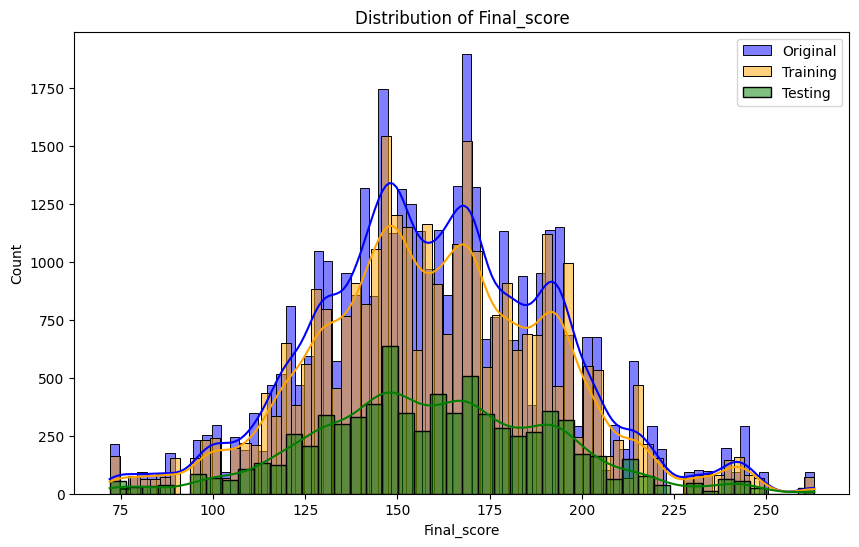

In [70]:
plt.figure(figsize=(10, 6))

sns.histplot(y['Final_score'], kde=True, label='Original', color='blue')
sns.histplot(y_train['Final_score'], kde=True, label='Training', color='orange')
sns.histplot(y_test['Final_score'], kde=True, label='Testing', color='green')

plt.title('Distribution of Final_score')
plt.legend()
plt.show()

In [71]:
x_train

,batting_team,bowling_team,city,current_score,ball_left,wicket_left,crr,last_five
27772,Sri Lanka,India,Chandigarh,180,11,3,9.908257,32.0
15998,West Indies,Bangladesh,Johannesburg,99,32,8,6.750000,35.0
20595,Australia,Sri Lanka,Nottingham,80,44,5,6.315789,19.0
43605,South Africa,Australia,Melbourne,30,87,8,5.454545,29.0
30954,West Indies,England,London,106,23,5,6.556701,34.0
...,...,...,...,...,...,...,...,...
35232,West Indies,New Zealand,Lauderhill,165,15,8,9.428571,63.0
13161,Bangladesh,Pakistan,Lahore,124,11,6,6.825688,37.0
10215,Australia,South Africa,Cape Town,93,71,10,11.387755,47.0
33994,India,South Africa,Colombo,53,73,7,6.765957,35.0


In [72]:
y_train

,Final_score,Boundary%
27772,206,55.34
15998,164,58.54
20595,159,61.64
43605,101,41.58
30954,125,52.80
...,...,...
35232,209,65.07
13161,141,49.65
10215,193,46.63
33994,152,51.32


In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost  import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [90]:
trf = ColumnTransformer([('trf',OneHotEncoder(sparse = False,drop = 'first'),['batting_team','bowling_team','city'])
                        ]
                       ,remainder = 'passthrough')




In [86]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [87]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mar = mean_absolute_error(y_test, y_pred)

C:\Users\sonal\Documents\virtualenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sonal\Documents\virtualenv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\sonal\Documents\virtualenv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\sonal\Documents\virtualenv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

In [88]:
print(r2)
print(mse)
print(mar)

0.9890019494148392
7.160599252504901
1.0723393087039323


In [ ]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
0.9890019494148392
7.160599252504901
1.0723393087039323